In [23]:
import os
os.chdir('../')

import torch 
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix, fbeta_score, precision_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, fbeta_score, precision_score, roc_auc_score

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

%load_ext autoreload
%autoreload 2

from src.utils.metrics import find_threshold, calc_thr_metrics

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
# epoch0 tr_epoch_loss=4.32 va_epoch_loss=3.82 | tr_epoch_acc@1=0.141 tr_epoch_acc@5=0.377 | va_epoch_acc@1=0.182 va_epoch_acc@5=0.452 
# epoch1 tr_epoch_loss=3.5 va_epoch_loss=3.5 | tr_epoch_acc@1=0.22 tr_epoch_acc@5=0.51 | va_epoch_acc@1=0.225 va_epoch_acc@5=0.528
# epoch2 tr_epoch_loss=3.22 va_epoch_loss=3.33 | tr_epoch_acc@1=0.257 tr_epoch_acc@5=0.563 | va_epoch_acc@1=0.252 va_epoch_acc@5=0.548
# epoch3 tr_epoch_loss=3.06 va_epoch_loss=3.24 | tr_epoch_acc@1=0.282 tr_epoch_acc@5=0.592 | va_epoch_acc@1=0.267 va_epoch_acc@5=0.571 
# epoch4 tr_epoch_loss=2.96 va_epoch_loss=3.26 | tr_epoch_acc@1=0.298 tr_epoch_acc@5=0.614 | va_epoch_acc@1=0.267 va_epoch_acc@5=0.571 
# epoch5 tr_epoch_loss=2.66 va_epoch_loss=2.9 | tr_epoch_acc@1=0.351 tr_epoch_acc@5=0.67 | va_epoch_acc@1=0.325 va_epoch_acc@5=0.634 
# epoch6 tr_epoch_loss=2.6 va_epoch_loss=2.89 | tr_epoch_acc@1=0.364 tr_epoch_acc@5=0.681 | va_epoch_acc@1=0.327 va_epoch_acc@5=0.638
# epoch7 tr_epoch_loss=2.57 va_epoch_loss=2.86 | tr_epoch_acc@1=0.371 tr_epoch_acc@5=0.687 | va_epoch_acc@1=0.336 va_epoch_acc@5=0.647
# epoch8 tr_epoch_loss=2.53 va_epoch_loss=2.85 | tr_epoch_acc@1=0.376 tr_epoch_acc@5=0.693 | va_epoch_acc@1=0.334 va_epoch_acc@5=0.647
# epoch9 tr_epoch_loss=2.5 va_epoch_loss=2.84 | tr_epoch_acc@1=0.382 tr_epoch_acc@5=0.699 | va_epoch_acc@1=0.337 va_epoch_acc@5=0.651
# epoch10 tr_epoch_loss=2.3 va_epoch_loss=2.66 | tr_epoch_acc@1=0.425 tr_epoch_acc@5=0.736 | va_epoch_acc@1=0.368 va_epoch_acc@5=0.681
# epoch11 tr_epoch_loss=2.25 va_epoch_loss=2.67 | tr_epoch_acc@1=0.434 tr_epoch_acc@5=0.746 | va_epoch_acc@1=0.377 va_epoch_acc@5=0.686
# epoch12 tr_epoch_loss=2.23 va_epoch_loss=2.69 | tr_epoch_acc@1=0.438 tr_epoch_acc@5=0.75 | va_epoch_acc@1=0.371 va_epoch_acc@5=0.678
# epoch13 tr_epoch_loss=2.19 va_epoch_loss=2.71 | tr_epoch_acc@1=0.444 tr_epoch_acc@5=0.755 | va_epoch_acc@1=0.36 va_epoch_acc@5=0.679
# epoch14 tr_epoch_loss=2.18 va_epoch_loss=2.68 | tr_epoch_acc@1=0.446 tr_epoch_acc@5=0.756 | va_epoch_acc@1=0.371 va_epoch_acc@5=0.683 

/var/folders/gk/hyhjx90n7qscqzv1ghgylvm80000gn/T/ipykernel_31795/2259766121.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.arange(len(va_list)), np.array(va_list), 'ro-', color='blue', label="validation")
/var/folders/gk/hyhjx90n7qscqzv1ghgylvm80000gn/T/ipykernel_31795/2259766121.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.arange(len(tr_list)), np.array(tr_list), 'ro-', color='red', label="train")


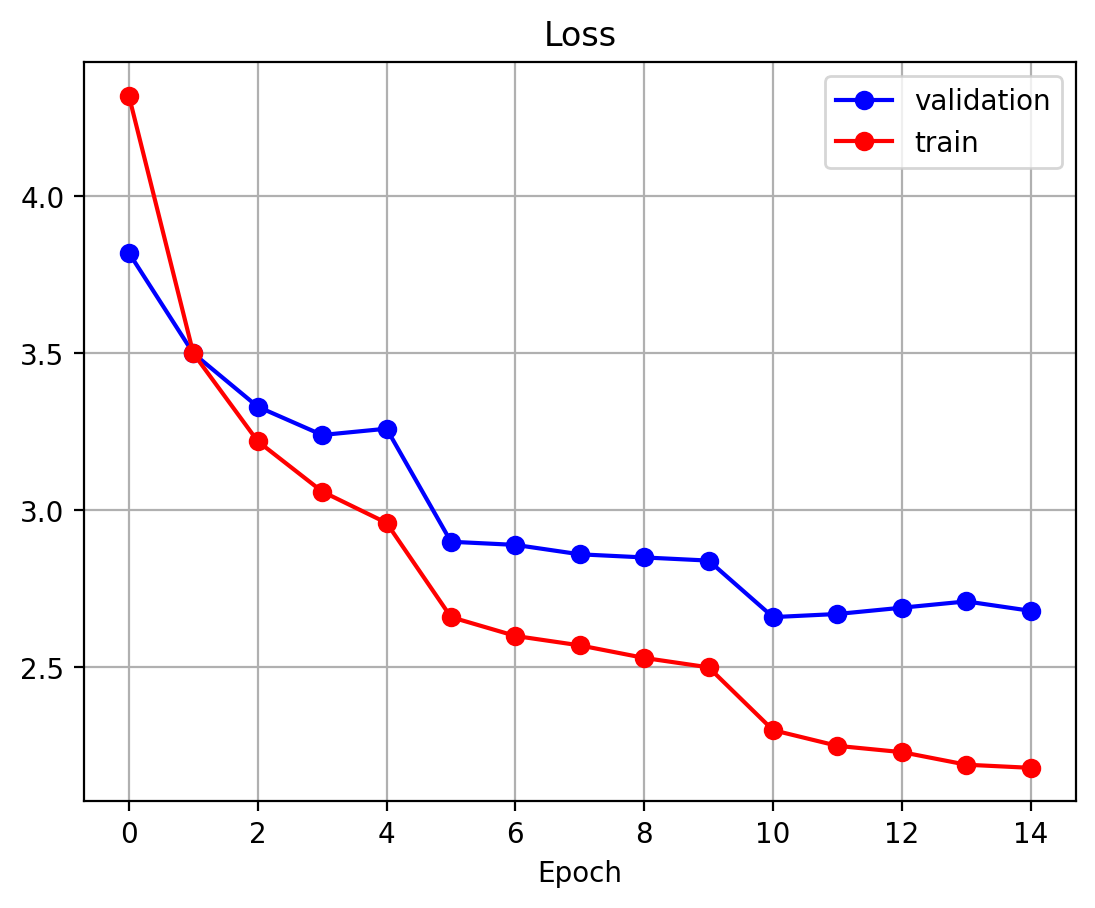

In [38]:
va_list = [3.82, 3.5, 3.33, 3.24, 3.26, 2.9, 2.89, 2.86, 2.85, 2.84, 2.66, 2.67, 2.69, 2.71, 2.68]
tr_list = [4.32, 3.5, 3.22, 3.06, 2.96, 2.66, 2.6, 2.57, 2.53, 2.5, 2.3, 2.25, 2.23, 2.19, 2.18]

plt.plot(np.arange(len(va_list)), np.array(va_list), 'ro-', color='blue', label="validation")
plt.plot(np.arange(len(tr_list)), np.array(tr_list), 'ro-', color='red', label="train")
plt.legend()
plt.grid()
plt.title('Loss')
plt.xlabel("Epoch")
plt.show();

/var/folders/gk/hyhjx90n7qscqzv1ghgylvm80000gn/T/ipykernel_31795/1113059849.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.arange(len(va_list)), np.array(va_list), 'ro-', color='blue', label="validation")
/var/folders/gk/hyhjx90n7qscqzv1ghgylvm80000gn/T/ipykernel_31795/1113059849.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.arange(len(tr_list)), np.array(tr_list), 'ro-', color='red', label="train")


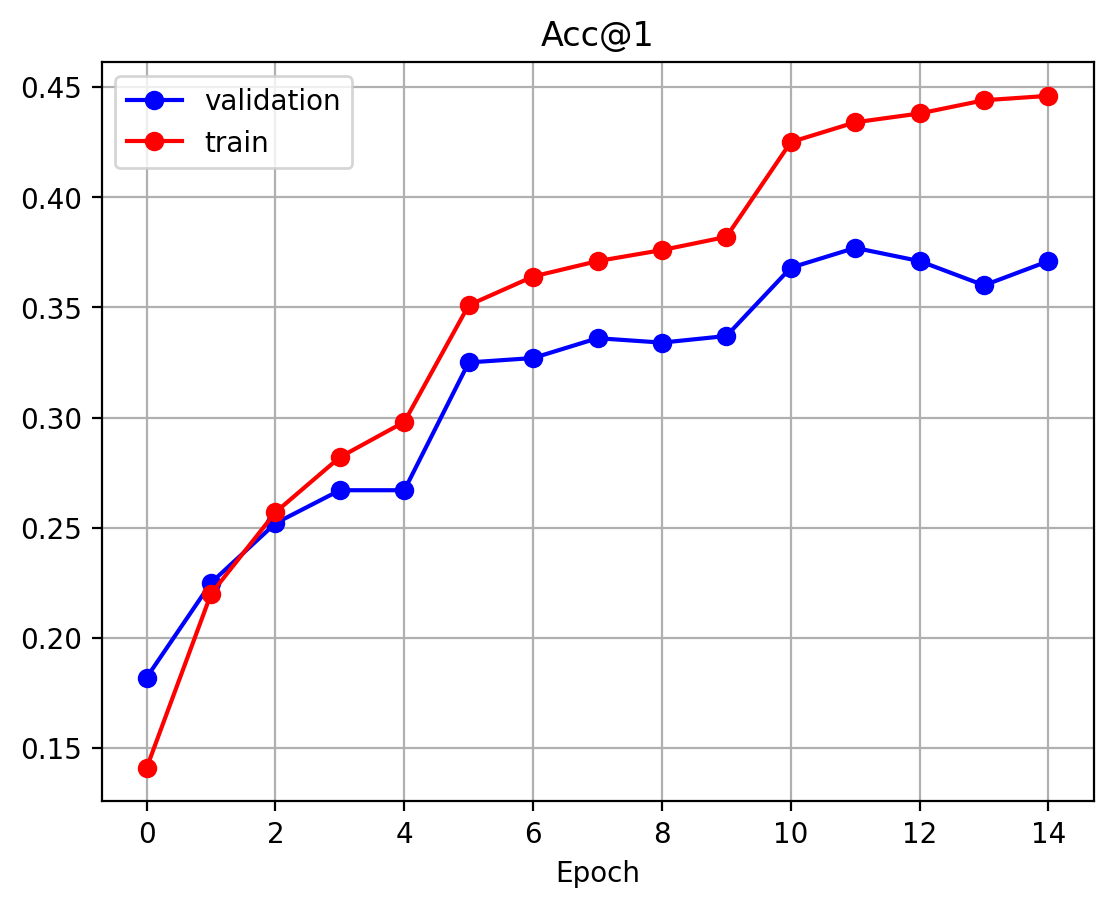

In [39]:
va_list = [0.182, 0.225, 0.252, 0.267, 0.267, 0.325, 0.327, 0.336, 0.334, 0.337, 0.368, 0.377, 0.371, 0.36, 0.371]
tr_list = [0.141, 0.22, 0.257, 0.282, 0.298, 0.351, 0.364, 0.371, 0.376, 0.382, 0.425, 0.434, 0.438, 0.444, 0.446]

plt.plot(np.arange(len(va_list)), np.array(va_list), 'ro-', color='blue', label="validation")
plt.plot(np.arange(len(tr_list)), np.array(tr_list), 'ro-', color='red', label="train")
plt.legend()
plt.grid()
plt.title('Acc@1')
plt.xlabel("Epoch")
plt.show();

In [14]:
def calc_metrics(trues, preds):
    tn, fp, fn, tp = confusion_matrix(trues, preds).ravel()
    precision = tp / (tp + fp + 1e-6) 
    recall = tp / (tp + fn + 1e-6)
    f1score = 2 * precision * recall / (precision + recall + 1e-6)
    return precision, recall, f1score

In [25]:
nsamples = 100000
mistake_trues = np.random.choice([0, 1], size=nsamples, p=[1-0.054, 0.054])

for q in np.linspace(0.01, 1.00, num=20):
    # q -- prob of "1" (mistake)
    
    # mistake
    mistake_preds = np.random.choice([0, 1], size=nsamples, p=[1-q, q])
    mistake_precision, mistake_recall, mistake_f1score = calc_metrics(trues=mistake_trues, preds=mistake_preds)
    print(f"MISTAKE",
          f"q={q:.2f}",
          f"precision={mistake_precision:.2f}", 
          f"recall={mistake_recall:.2f}",
          f"f1score={mistake_f1score:.2f}")

    # correct
    correct_precision, correct_recall, correct_f1score = calc_metrics(trues=1-mistake_trues, preds=1-mistake_preds)
    print(f"CORRECT",
          f"q={q:.2f}",
          f"precision={correct_precision:.2f}", 
          f"recall={correct_recall:.2f}",
          f"f1score={correct_f1score:.2f}")
    
    # average correct_f1score and mistake_f1score
    print((mistake_f1score + correct_f1score) / 2)
    print(2*mistake_f1score*correct_f1score / (mistake_f1score + correct_f1score))
    print()

MISTAKE q=0.01 precision=0.06 recall=0.01 f1score=0.02
CORRECT q=0.01 precision=0.95 recall=0.99 f1score=0.97
0.4928054876112493
0.03476744932689632

MISTAKE q=0.06 precision=0.06 recall=0.07 f1score=0.06
CORRECT q=0.06 precision=0.95 recall=0.94 f1score=0.94
0.5023064190216828
0.11539974767769501

MISTAKE q=0.11 precision=0.06 recall=0.12 f1score=0.08
CORRECT q=0.11 precision=0.95 recall=0.88 f1score=0.91
0.49557279388513364
0.14084983755576305

MISTAKE q=0.17 precision=0.06 recall=0.17 f1score=0.08
CORRECT q=0.17 precision=0.95 recall=0.83 f1score=0.89
0.48488669956800434
0.15307356023843335

MISTAKE q=0.22 precision=0.05 recall=0.22 f1score=0.09
CORRECT q=0.22 precision=0.95 recall=0.78 f1score=0.86
0.47174383770841744
0.1569971354583779

MISTAKE q=0.27 precision=0.05 recall=0.27 f1score=0.09
CORRECT q=0.27 precision=0.95 recall=0.73 f1score=0.82
0.45579946338825167
0.1583276962885405

MISTAKE q=0.32 precision=0.05 recall=0.33 f1score=0.09
CORRECT q=0.32 precision=0.95 recall=0.68 f

In [32]:
2 * 12.96 * 26.92 / (12.96 + 26.92)

17.496649949849548

In [33]:
2 * 82.56 * 51.82 / (82.56 + 51.82)

63.67404673314482

In [82]:
2 * 15.00 * 46.15 / (15.00 + 46.15)

22.641046606704826

In [81]:
2 * 60.87 * 10.22 / (60.87 + 10.22)

17.50151638767759

In [1]:
2 * 82.56 * 51.82 / (82.56 + 51.82)

63.67404673314482

In [2]:
2 * 12.96 * 26.92 / (12.96 + 26.92)

17.496649949849548

In [61]:
f1_score(y_true=trues, y_pred=preds, average="binary")

0.05881862867616429

In [44]:
f1_score(y_true=trues, y_pred=preds, average="micro")

0.8868

In [45]:
f1_score(y_true=trues, y_pred=preds, average="macro")

0.49807031625521664

In [46]:
f1_score(y_true=trues, y_pred=preds, average="weighted")

0.8869678529155754

In [298]:
probs = torch.tensor([
        [0.9523, 0.0477],
        [0.9223, 0.0777],
        [0.8919, 0.1081],
        [0.9314, 0.0686],
        [0.9558, 0.0442],
        [0.8925, 0.1075],
        [0.8680, 0.1320],
        [0.8539, 0.1461],
        [0.8912, 0.1088],
        [0.9176, 0.0824],
        [0.8739, 0.1261],
        [0.9115, 0.0885],
        [0.9268, 0.0732],
        [0.9368, 0.0632],
        [0.9373, 0.0627],
        [0.9121, 0.0879],
        [0.9426, 0.0574],
        [0.8813, 0.1187],
        [0.9172, 0.0828],
        [0.8823, 0.1177],
        [0.9387, 0.0613],
        [0.8999, 0.1001],
        [0.8832, 0.1168],
        [0.9137, 0.0863],
        [0.9025, 0.0975],
        [0.8727, 0.1273],
        [0.8764, 0.1236],
        [0.8751, 0.1249],
        [0.8715, 0.1285],
        [0.8782, 0.1218],
        [0.8747, 0.1253],
        [0.8562, 0.1438],
        [0.8918, 0.1082],
        [0.8806, 0.1194],
        [0.8723, 0.1277],
        [0.9100, 0.0900],
        [0.8972, 0.1028],
        [0.8751, 0.1249],
        [0.8765, 0.1235],
        [0.9257, 0.0743],
        [0.8788, 0.1212],
        [0.8695, 0.1305],
        [0.8771, 0.1229],
        [0.8643, 0.1357],
        [0.8775, 0.1225],
        [0.8772, 0.1228],
        [0.8812, 0.1188],
        [0.8795, 0.1205],
        [0.8682, 0.1318],
        [0.8644, 0.1356],
        [0.8940, 0.1060],
        [0.8833, 0.1167],
        [0.8977, 0.1023],
        [0.8874, 0.1126],
        [0.8819, 0.1181],
        [0.8558, 0.1442],
        [0.8497, 0.1503],
        [0.8835, 0.1165],
        [0.8656, 0.1344],
        [0.8885, 0.1115],
        [0.8935, 0.1065],
        [0.9141, 0.0859],
        [0.8946, 0.1054],
        [0.8546, 0.1454],
        [0.8725, 0.1275],
        [0.9117, 0.0883],
        [0.8954, 0.1046],
        [0.8968, 0.1032],
        [0.8780, 0.1220],
        [0.9188, 0.0812],
        [0.8823, 0.1177],
        [0.9050, 0.0950],
        [0.9126, 0.0874],
        [0.8705, 0.1295],
        [0.8722, 0.1278],
        [0.8689, 0.1311],
        [0.8581, 0.1419],
        [0.9064, 0.0936],
        [0.8597, 0.1403],
        [0.8946, 0.1054],
        [0.8995, 0.1005],
        [0.8739, 0.1261],
        [0.9070, 0.0930],
        [0.9109, 0.0891],
        [0.9147, 0.0853],
        [0.8876, 0.1124],
        [0.9373, 0.0627],
        [0.9172, 0.0828],
        [0.9539, 0.0461],
        [0.9600, 0.0400],
        [0.8979, 0.1021],
        [0.8920, 0.1080],
        [0.8740, 0.1260],
        [0.9098, 0.0902],
        [0.9026, 0.0974],
        [0.8724, 0.1276],
        [0.8816, 0.1184],
        [0.8671, 0.1329],
        [0.8955, 0.1045],
        [0.8992, 0.1008],
        [0.8806, 0.1194],
        [0.8772, 0.1228],
        [0.9201, 0.0799],
        [0.9480, 0.0520],
        [0.9329, 0.0671],
        [0.8893, 0.1107],
        [0.9448, 0.0552],
        [0.9190, 0.0810],
        [0.8610, 0.1390],
        [0.9228, 0.0772]
])
trues = torch.tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
        1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])

preds = (probs[:,1] > 0.001).int()

In [302]:
trues

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
        1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])

In [306]:
from sklearn.metrics import classification_report

print(classification_report(trues, preds, zero_division=True))

              precision    recall  f1-score   support

         0.0       1.00      0.00      0.00       104
         1.0       0.05      1.00      0.10         6

    accuracy                           0.05       110
   macro avg       0.53      0.50      0.05       110
weighted avg       0.95      0.05      0.01       110



In [297]:
probs[:,1]

tensor([0.0477, 0.0777, 0.1081, 0.0686, 0.0442, 0.1075, 0.1320, 0.1461, 0.1088,
        0.0824, 0.1261, 0.0885, 0.0732, 0.0632, 0.0627, 0.0879, 0.0574, 0.1187,
        0.0828, 0.1177, 0.0613, 0.1001, 0.1168, 0.0863, 0.0975, 0.1273, 0.1236,
        0.1249, 0.1285, 0.1218, 0.1253, 0.1438, 0.1082, 0.1194, 0.1277, 0.0900,
        0.1028, 0.1249, 0.1235, 0.0743, 0.1212, 0.1305, 0.1229, 0.1357, 0.1225,
        0.1228, 0.1188, 0.1205, 0.1318, 0.1356, 0.1060, 0.1167, 0.1023, 0.1126,
        0.1181, 0.1442, 0.1503, 0.1165, 0.1344, 0.1115, 0.1065, 0.0859, 0.1054,
        0.1454, 0.1275, 0.0883, 0.1046, 0.1032, 0.1220, 0.0812, 0.1177, 0.0950,
        0.0874, 0.1295, 0.1278, 0.1311, 0.1419, 0.0936, 0.1403, 0.1054, 0.1005,
        0.1261, 0.0930, 0.0891, 0.0853, 0.1124, 0.0627, 0.0828, 0.0461, 0.0400,
        0.1021, 0.1080, 0.1260, 0.0902, 0.0974, 0.1276, 0.1184, 0.1329, 0.1045,
        0.1008, 0.1194, 0.1228, 0.0799, 0.0520, 0.0671, 0.1107, 0.0552, 0.0810,
        0.1390, 0.0772])

In [188]:
# len(thr_list)
# thr_list.min(), thr_list.max()

In [189]:
# thr_list = torch.linspace(0.04, 0.15, steps=200)
thr_list = torch.unique(probs[:,1])

f1score_list = torch.empty(len(thr_list), dtype=torch.float32)
precision_list = torch.empty(len(thr_list), dtype=torch.float32)
recall_list = torch.empty(len(thr_list), dtype=torch.float32)

for i, thr in enumerate(thr_list):

    preds = (probs[:,1] >= thr).int()

    tp = torch.sum((trues == 1) & (preds == 1))
    tn = torch.sum((trues == 0) & (preds == 0))
    fp = torch.sum((trues == 0) & (preds == 1))
    fn = torch.sum((trues == 1) & (preds == 0))

    precision = tp / (tp + fp + 1e-6)
    recall = tp / (tp + fn + 1e-6)
    f1score = 2 * precision * recall / (precision + recall + 1e-6)
    
    f1score_list[i] = f1score
    precision_list[i] = precision
    recall_list[i] = recall

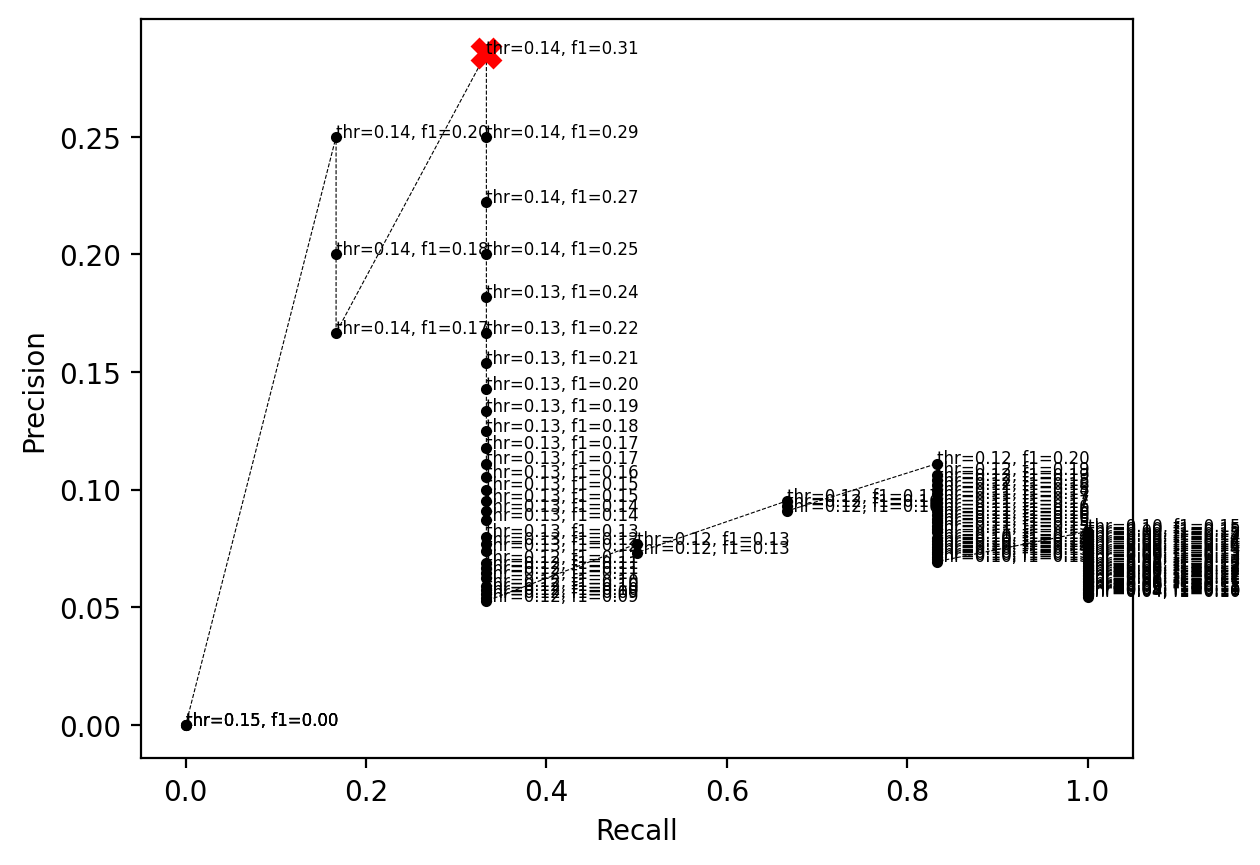

In [147]:
index = torch.argmax(f1score_list)

plt.plot(recall_list, precision_list, linestyle='--', marker='.', color='k', lw=0.4)
plt.plot(recall_list[index], precision_list[index], marker='X', color='red', markersize=10)
plt.xlabel('Recall')
plt.ylabel('Precision');

for i in range(0, len(thr_list), 1):
    plt.annotate(
        text=f'thr={thr_list[i]:.2f}, f1={f1score_list[i]:.2f}', 
        xy=(recall_list[i], precision_list[i]), 
        ha='left',
        fontsize=6
    )


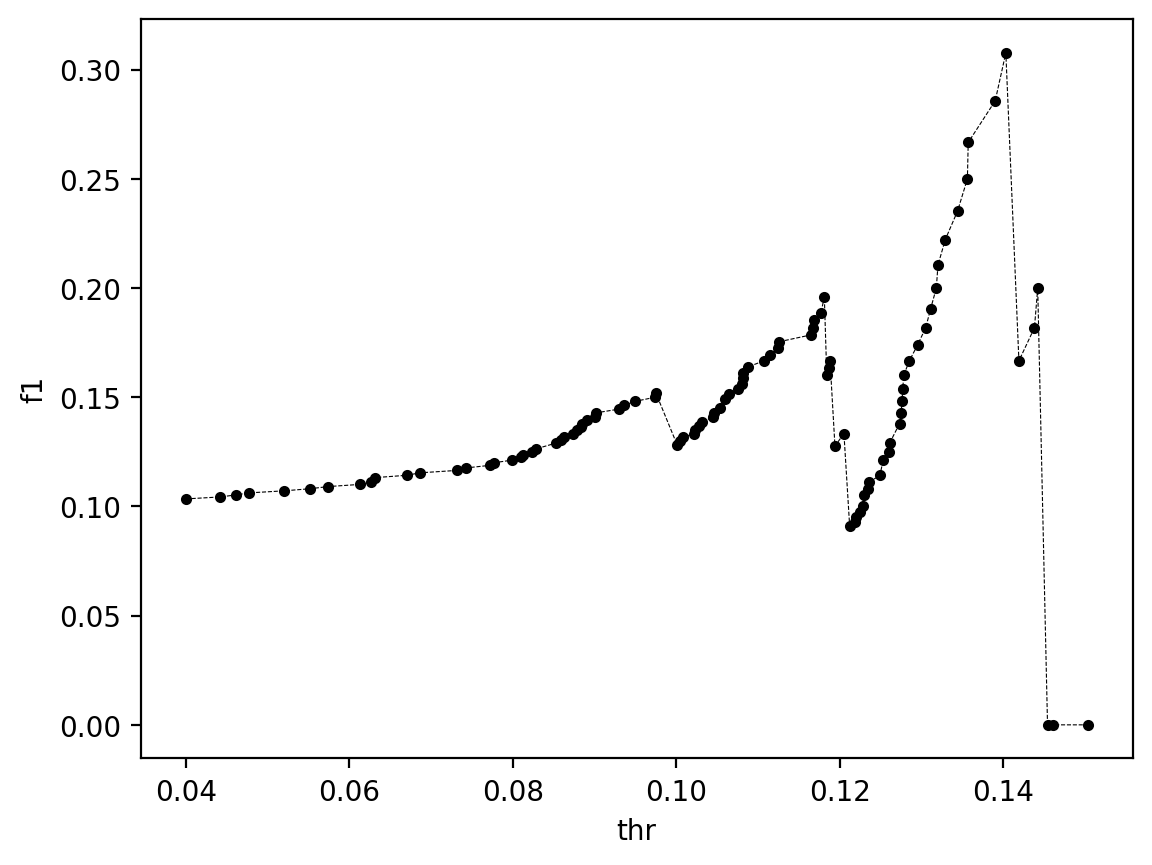

In [190]:
plt.plot(thr_list, f1score_list, linestyle='--', marker='.', color='k', lw=0.4)
plt.xlabel('thr')
plt.ylabel('f1');

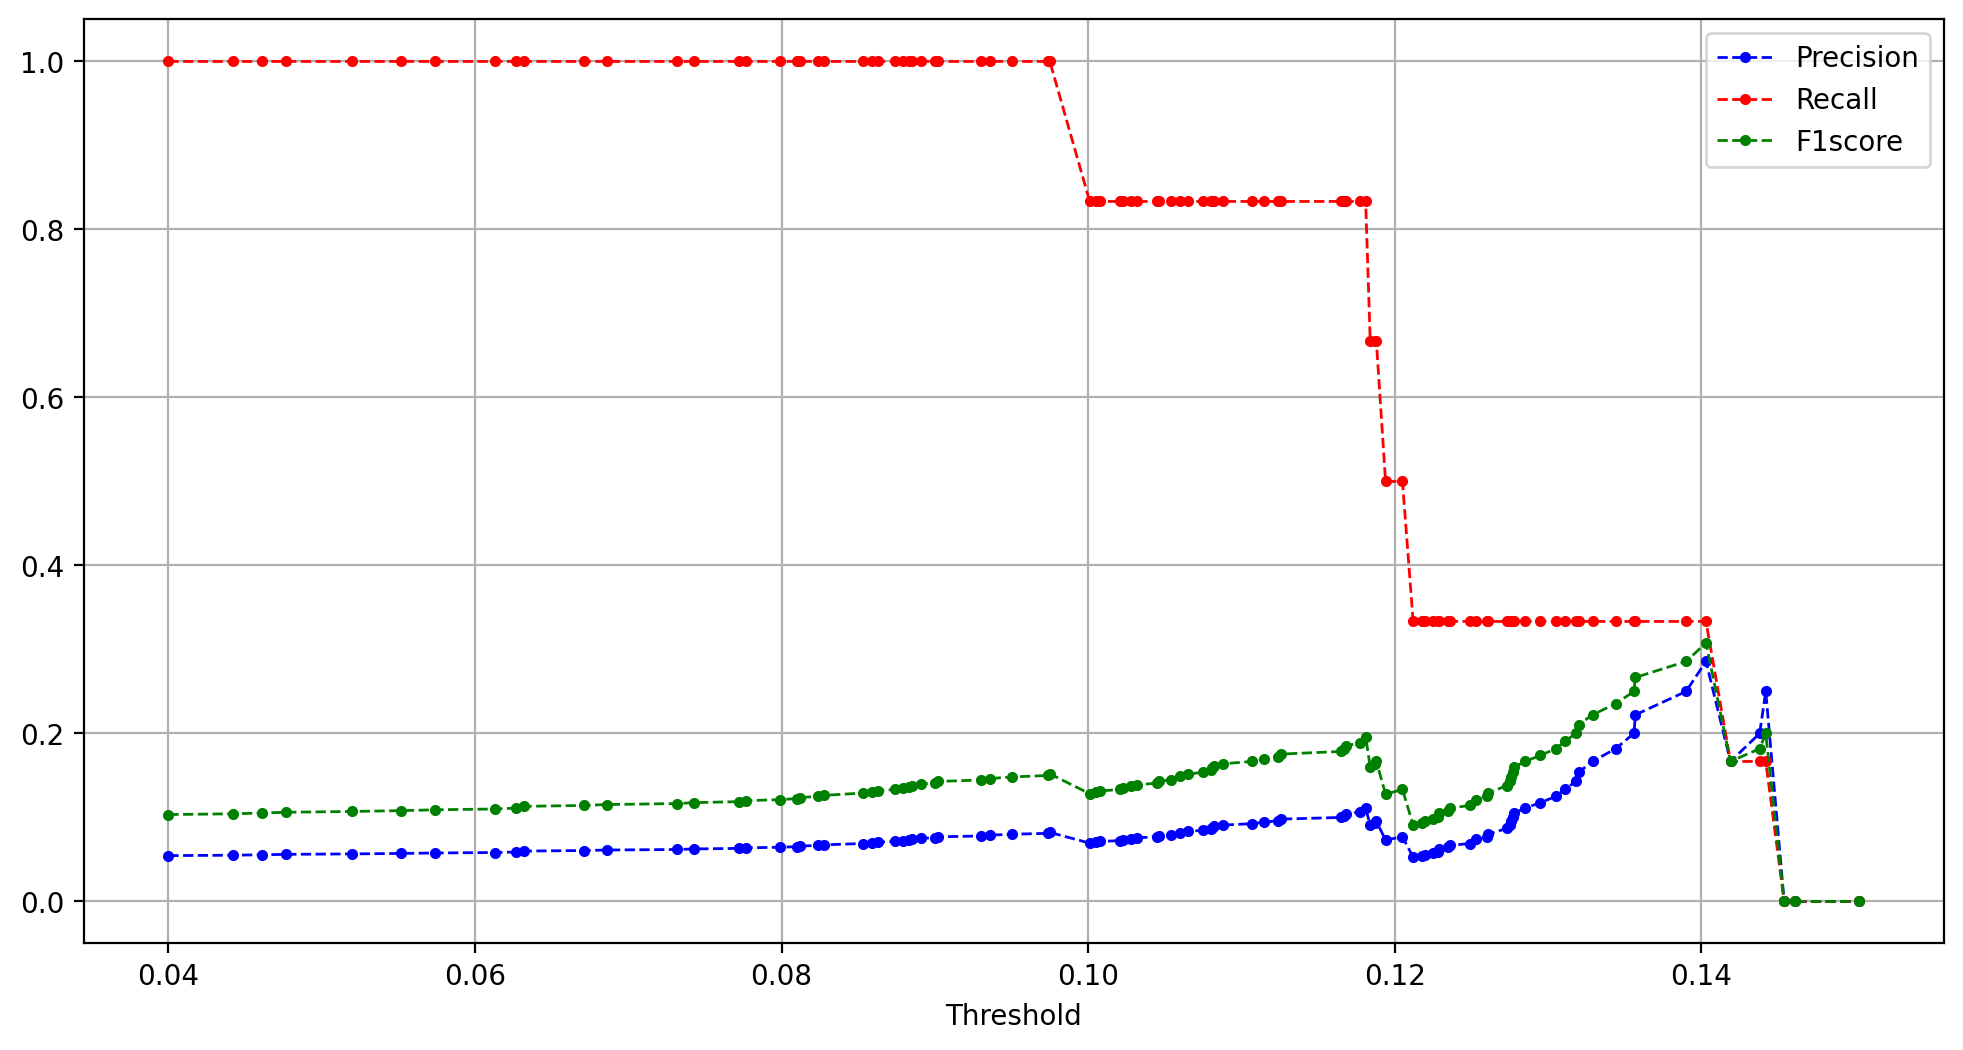

In [212]:
plt.figure(figsize=(12,6))
plt.plot(thr_list, precision_list, linestyle='--', marker='.', color='blue', lw=1, label="Precision")
plt.plot(thr_list, recall_list, linestyle='--', marker='.', color='red', lw=1, label="Recall")
plt.plot(thr_list, f1score_list, linestyle='--', marker='.', color='green', lw=1, label='F1score')
plt.xlabel('Threshold');
plt.grid()
plt.legend();

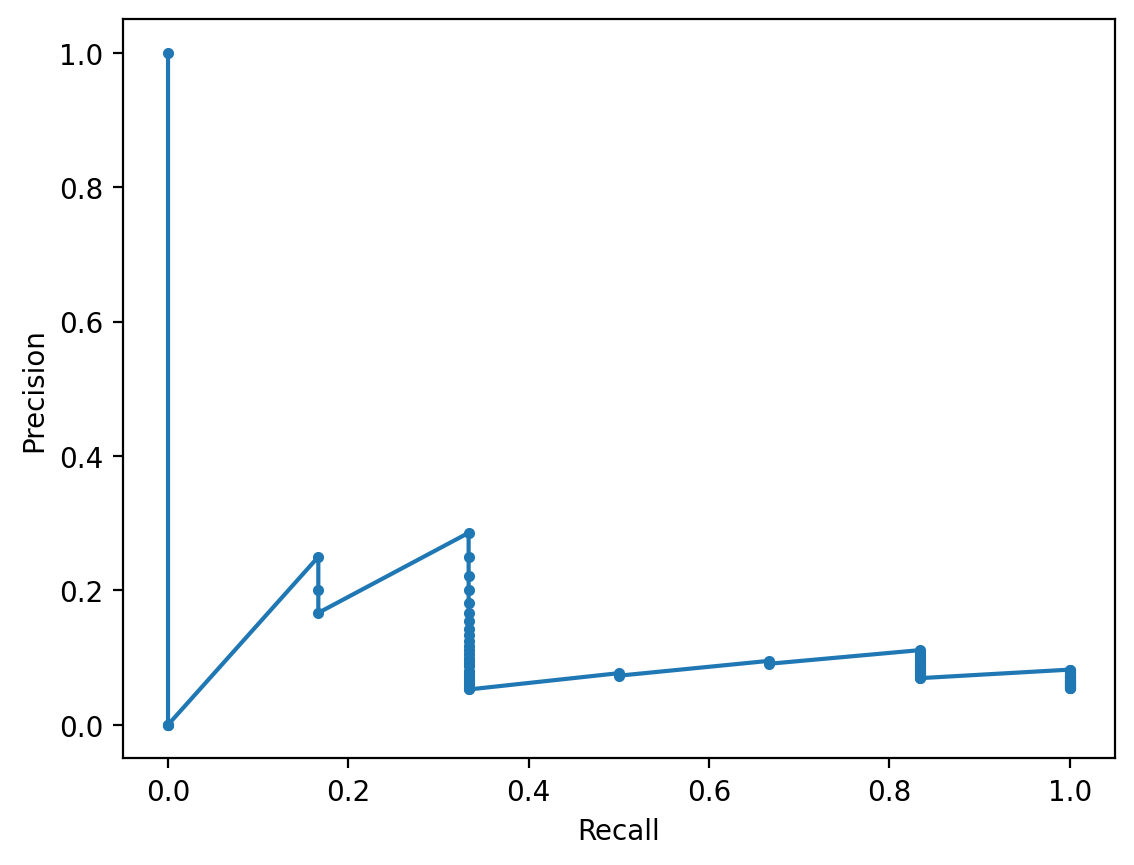

In [196]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(trues, probs[:,1])
precision, recall, thresholds

plt.plot(recall , precision, marker='.');
plt.xlabel('Recall')
plt.ylabel('Precision');

In [199]:
len(precision), len(thresholds)

(103, 102)

Text(0.5, 0, 'thr')

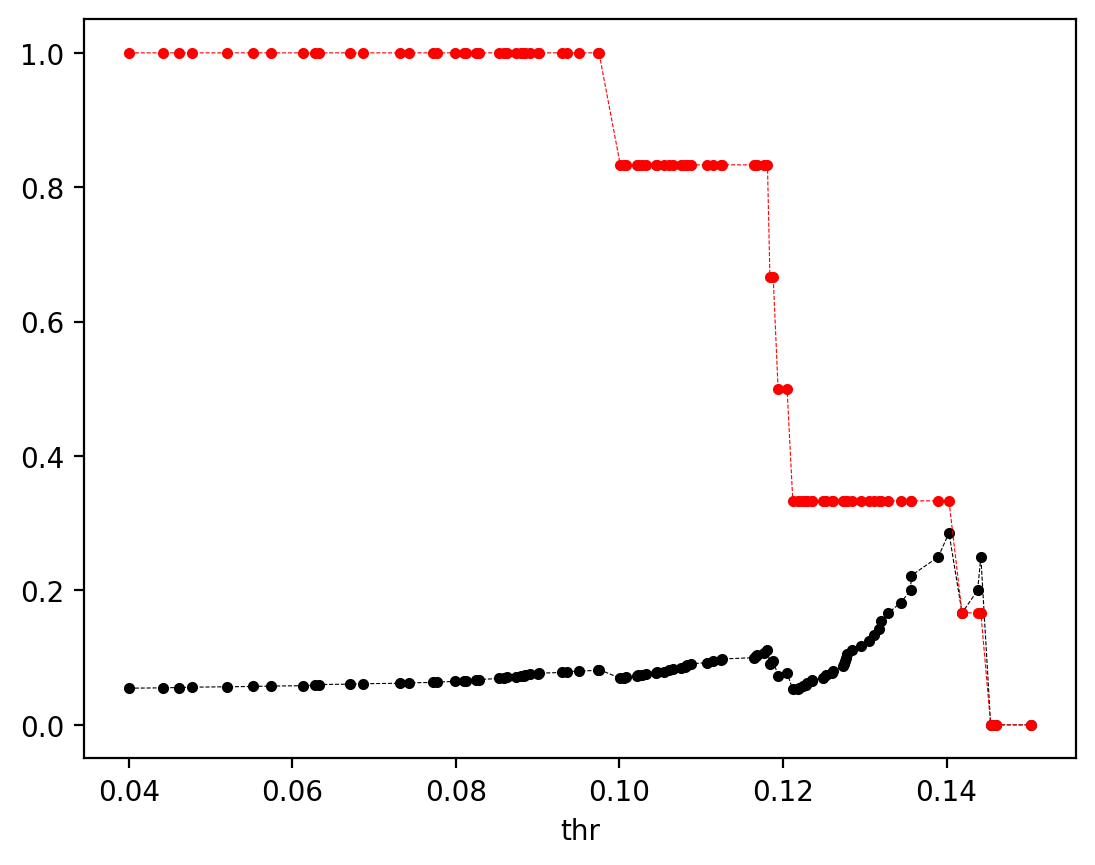

In [200]:
plt.plot(thresholds, precision[:-1], linestyle='--', marker='.', color='k', lw=0.4)
plt.plot(thresholds, recall[:-1], linestyle='--', marker='.', color='red', lw=0.4)
plt.xlabel('thr')

In [186]:
precision[-10:]

array([0.22222222, 0.25      , 0.28571429, 0.16666667, 0.2       ,
       0.25      , 0.        , 0.        , 0.        , 1.        ])

In [ ]:
precision[-10:]

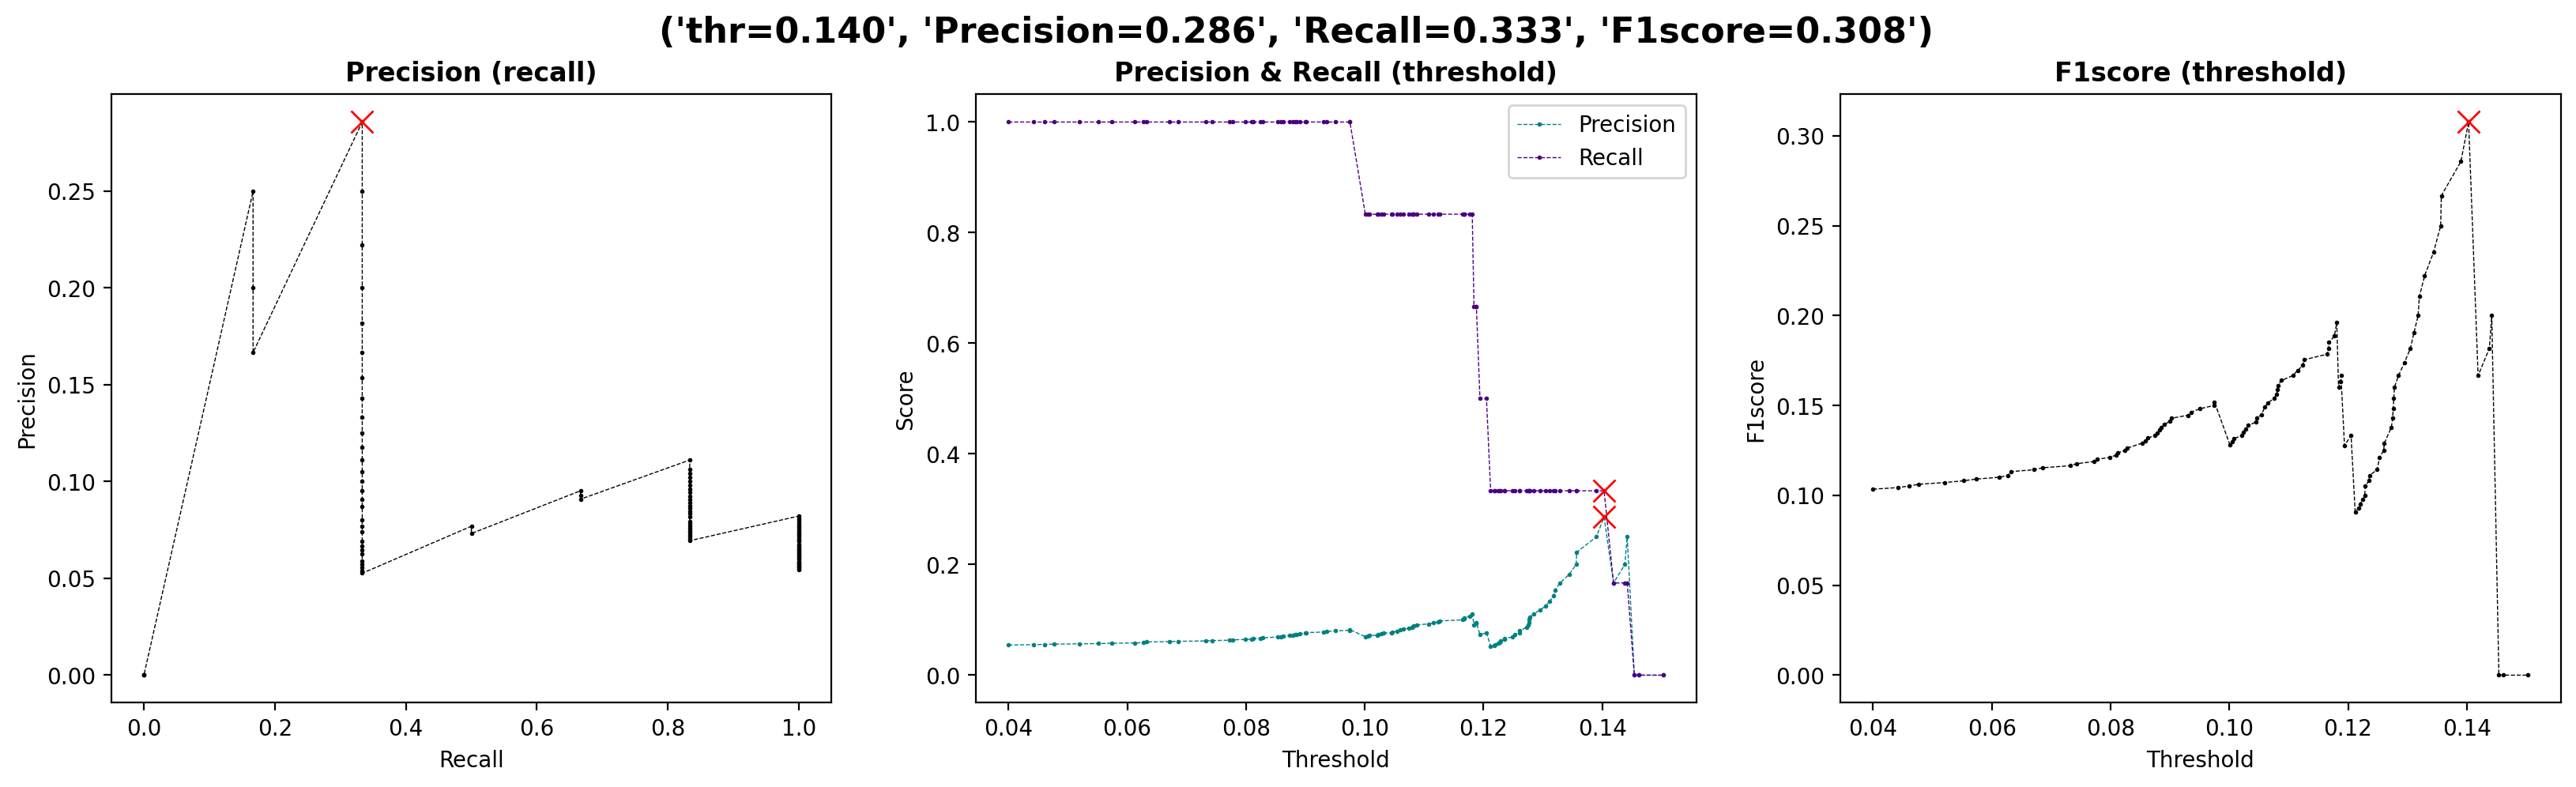

In [295]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

ax1.plot(recall_list, precision_list, linestyle='--', marker='.', color='k', lw=0.5, markersize=2)
ax1.plot(recall_list[index], precision_list[index], marker='x', color='red', markersize=10)
ax1.set_title("Precision (recall)", fontweight='bold')
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')

ax2.plot(thr_list, precision_list, linestyle='--', marker='.', color='teal', lw=0.5, markersize=2, label="Precision")
ax2.plot(thr_list, recall_list, linestyle='--', marker='.', color='indigo', lw=0.5, markersize=2, label="Recall")
ax2.legend()
ax2.plot(thr_list[index], precision_list[index], marker='x', color='red', markersize=10)
ax2.plot(thr_list[index], recall_list[index], marker='x', color='red', markersize=10)
ax2.set_title("Precision & Recall (threshold)", fontweight='bold')
ax2.set_xlabel('Threshold')
ax2.set_ylabel('Score')

ax3.plot(thr_list, f1score_list, linestyle='--', marker='.', color='k', lw=0.5, markersize=2, label="F1score")
ax3.plot(thr_list[index], f1score_list[index], marker='x', color='red', markersize=10)
ax3.set_title("F1score (threshold)", fontweight='bold')
ax3.set_xlabel('Threshold')
ax3.set_ylabel('F1score')

title = f"thr={thr_list[index]:.3f}", \
        f"Precision={precision_list[index]:.3f}", \
        f"Recall={recall_list[index]:.3f}", \
        f"F1score={f1score_list[index]:.3f}", \
        
fig.suptitle(title, fontsize=16, fontweight='bold');

In [290]:
# fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(16,8))
# ax1.plot(thr_list, precision_list, linestyle='--', marker='.', color='teal', lw=0.5, markersize=5, label="Precision")
# ax1.plot(thr_list, recall_list, linestyle='--', marker='.', color='indigo', lw=0.5, markersize=5, label="Recall")
# ax1.plot(thr_list, f1score_list, linestyle='--', marker='.', color='red', lw=0.5, markersize=5, label="F1score")
# ax1.legend()
# ax1.axvline(x=thr_list[index], ls='--', color='k', lw=0.5)
# ax1.set_xlabel('Threshold')
# ax1.set_ylabel('Score')

# title = f"thr={thr_list[index]:.3f}", \
#         f"Precision={precision_list[index]:.3f}", \
#         f"Recall={recall_list[index]:.3f}", \
#         f"F1score={f1score_list[index]:.3f}", \
        
# ax1.set_title(title, fontsize=16, fontweight='bold')      
# # fig.savefig(fname, dpi=100)
# # plt.close(fig)

In [37]:
import torch
from torchvision import models
model = models.resnet18(num_classes=4)

In [38]:
model(torch.zeros((1, 3, 800, 800)))

tensor([[-0.0261, -0.0057, -0.0194,  0.0344]], grad_fn=<AddmmBackward0>)

In [40]:
model(torch.zeros((1, 3, 500, 800)))

tensor([[-0.0261, -0.0057, -0.0194,  0.0344]], grad_fn=<AddmmBackward0>)

In [41]:
model(torch.zeros((1, 3, 300, 800)))

tensor([[-0.0261, -0.0057, -0.0194,  0.0344]], grad_fn=<AddmmBackward0>)